In [ ]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = '/home/mateusz/Desktop/Demand-Forecast/baseline/results/ARIMA_2024-7-16-4:24:10.pkl'
data = pkl.load(open(path, 'rb'))

stores = []
skus = []
rmses = []
preds = []
gts = []

for key in data.keys():
    run = data[key]
    stores.append(key.split('_')[0])
    skus.append(key.split('_')[1])
    rmses.append(run['rmse'])
    preds.append(run['preds'])
    gts.append(run['gt'])

stores_strip = list(set(stores))
skus_strip = list(set(skus))

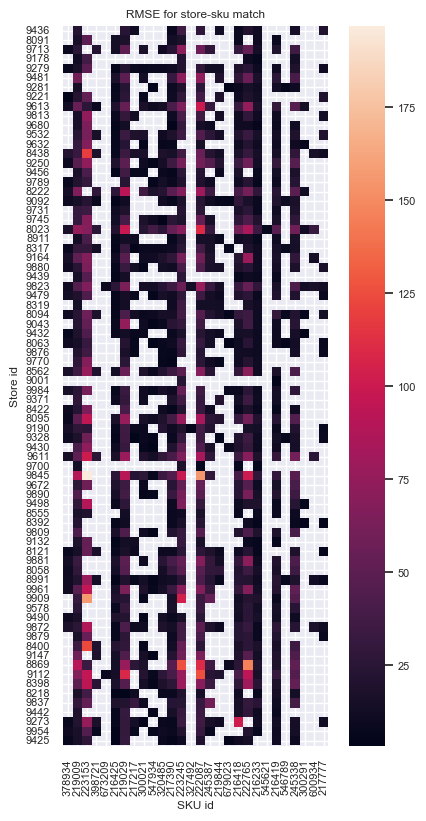

In [2]:
out_matrix = np.zeros((len(stores_strip), len(skus_strip)))
for i in range(len(stores_strip)):
    for k in range(len(skus_strip)):
        out_matrix[i][k] = data[f'{stores_strip[i]}_{skus_strip[k]}']['rmse']


dims = (4.5, 8.27)
plt.rcParams.update({'font.size': .81})
sns.set(font_scale=.71)
fig, ax = plt.subplots(figsize=dims)
ax = sns.heatmap(out_matrix, xticklabels=skus_strip, yticklabels=stores_strip, square=True)
ax.set_xlabel('SKU id')
ax.set_ylabel('Store id')
plt.title('RMSE for store-sku match')
plt.tight_layout()
plt.show()

Lowest RMSE score
Store: 9132, SKU: 216425


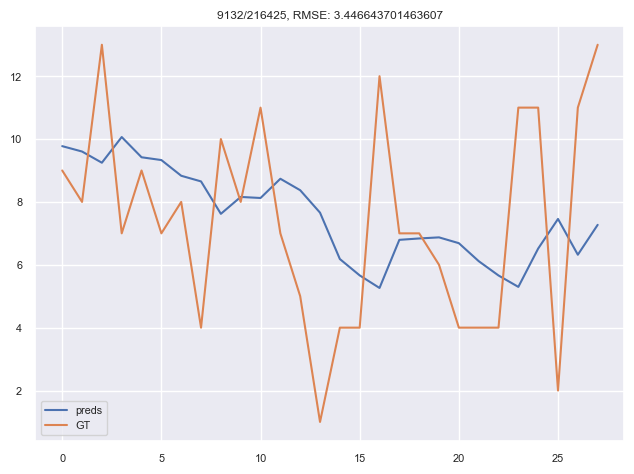

Store: 9281, SKU: 679023


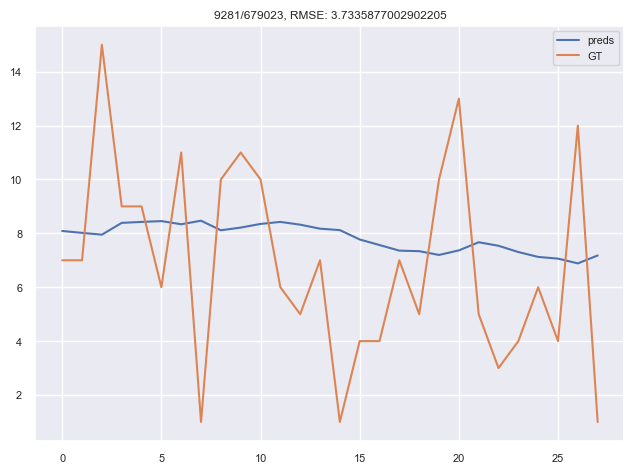

Store: 9430, SKU: 547934


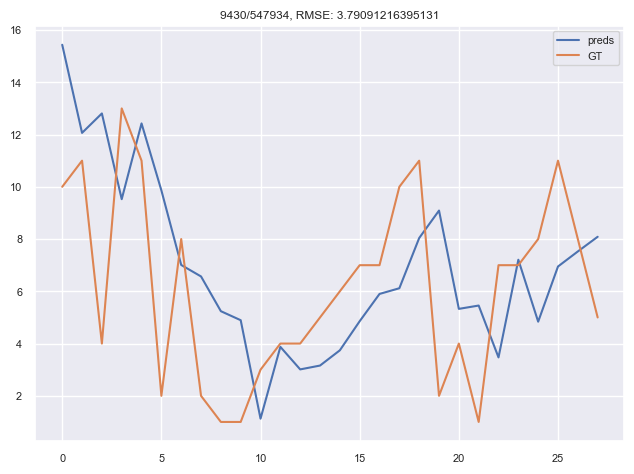

Store: 9456, SKU: 216425


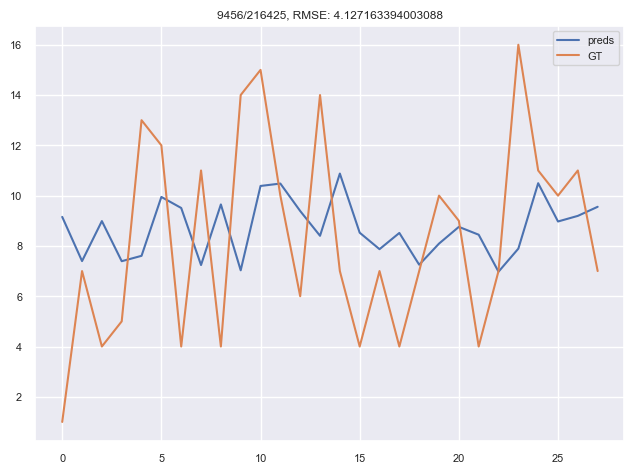

Store: 8063, SKU: 547934


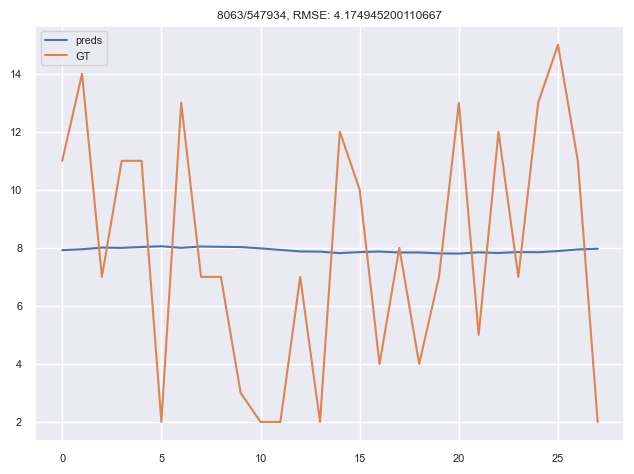

In [3]:
successful = np.where([x.size > 12 for x in gts])[0]

stores_s = [stores[i] for i in successful]
skus_s = [skus[i] for i in successful]
rmses_s = [rmses[i] for i in successful]
preds_s = [preds[i] for i in successful]
gts_s = [gts[i] for i in successful]

print('Lowest RMSE score')
rmses_order = np.argsort(rmses_s)[:5]
for ind in rmses_order:
    print(f'Store: {stores_s[ind]}, SKU: {skus_s[ind]}')
    plt.plot(preds_s[ind], label='preds')
    plt.plot(gts_s[ind], label='GT')
    plt.title(f'{stores_s[ind]}/{skus_s[ind]}, RMSE: {rmses_s[ind]}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [4]:
# get mean score
mean_score = np.mean(out_matrix[~np.isnan(out_matrix)])
print(f'Mean rmse: {mean_score}')

Mean rmse: 25.335953891920152
